In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df1.shape

(207917, 3)

In [9]:
# I want to find how many times each user visited?
users_by_visit=df1.groupby('user_id').count()

In [25]:
users_by_visit.visited.unique()

array([  1,  14, 284,   2,   7,  18, 342,   8,  17,   9,   3, 362, 521,
        59,  78, 205, 104,   5,  72,  24,   6,  20,   4, 111, 157, 147,
       319,  13,  22,  56,  16, 159, 213, 142, 107, 305, 196,  60, 264,
        21,  25, 271,  94, 167,  81, 202, 108,  33,  49, 110,  11,  12,
        41,  32,  96, 487, 117, 146,  76,  98,  31, 283, 308, 134,  28,
        89, 114, 250,  40, 211, 115,  44,  10, 489, 408,  87, 197, 209,
       126, 295, 428, 437, 360, 109, 130,  68,  47,  80, 313, 224, 600,
       247, 131, 160, 218,  29, 152,  65, 260, 367, 318, 326, 174, 222,
       112, 163,  42, 397, 137, 106,  75, 374,  36,  19,  79,  48, 199,
       304, 272,  82, 132, 210, 234, 187, 155, 345, 297, 289, 100, 113,
       151,  85, 141,  35, 229, 119, 148,  46, 102, 254,  55,  26, 452,
       217, 593, 242, 470, 153, 144, 266, 156,  93,  97, 236, 256, 279,
       320,  66,  45, 139, 488, 309, 118,  52,  43, 291,  88, 123, 178,
        51, 302,  23,  95, 188, 496,  58, 220, 349,  71,  38, 12

In [26]:
# I want to find the user who visited the most
users_by_visit.visited.max()

606

In [19]:
print(users_by_visit[users_by_visit['visited']==606])

         time_stamp  visited
user_id                     
3623            606      606


In [3]:
df2 = pd.read_csv('takehome_users.csv')
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
df2.shape

(12000, 10)

In [22]:
df2[df2['object_id']==3623]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
3622,3623,2012-06-25 14:34:33,Melo Vit�ria,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,1.401201e+09,0,0,364,3623.0


In [27]:
# I want to check the creation source
df2['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

Looks like the users have signed up for ('GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS','SIGNUP_GOOGLE_AUTH')

In [ ]:
# how many were refered from existing users?

In [38]:
# import pandasql as ps
#print(ps.sqldf("select a.object_id,b.object_id from df a, df b where a.object_id = b.invited_by_user_id"))

In [42]:
x=df2['invited_by_user_id'].isin(df2['object_id']).any()

In [46]:
y=df2.apply(lambda row:row.value_counts()[row['object_id']] > 1 , axis=1)

In [47]:
df2[y]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
22,23,2012-08-17 08:30:27,Souza Alice,AliceAraujoSouza@gustr.com,ORG_INVITE,1.345279e+09,1,0,6,23.0
49,50,2012-06-03 11:02:08,Oliveira Gabrielly,GabriellyAlmeidaOliveira@gmail.com,GUEST_INVITE,1.350990e+09,0,0,61,50.0
120,121,2013-01-03 23:57:39,Toft Dennis,DennisMToft@cuvox.de,GUEST_INVITE,1.357257e+09,1,0,402,121.0
137,138,2013-07-04 20:12:30,Gibbs Henry,HenryGibbs@gmail.com,SIGNUP_GOOGLE_AUTH,1.372969e+09,0,0,138,NaN
...,...,...,...,...,...,...,...,...,...,...
11767,11768,2012-10-10 12:02:31,White Robert,RobertRWhite@cuvox.de,ORG_INVITE,NaN,0,0,38,11768.0
11773,11774,2012-07-10 10:01:09,Toft Louise,qwnamkpr@rimoj.com,ORG_INVITE,1.342346e+09,0,0,3,11774.0
11794,11795,2012-10-25 14:15:03,K�nig Frank,FrankKonig@cuvox.de,ORG_INVITE,1.351175e+09,0,0,153,11795.0
11803,11804,2012-06-18 09:20:44,Lund Jens,JensSLund@gmail.com,GUEST_INVITE,NaN,0,0,26,11804.0


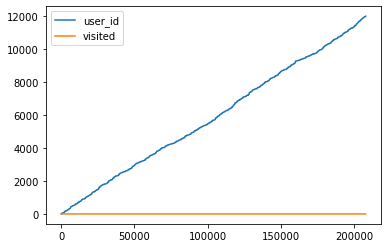

In [48]:
# I want to visualize users activity
df1.plot()
plt.show()